In [140]:
import numpy as np
import pandas as pd

In [141]:
ratingsdf = pd.read_csv(r'ml-latest-small\ml-latest-small\ratings.csv')
moviesdf = pd.read_csv(r'ml-latest-small\ml-latest-small\movies.csv')
tagdf = pd.read_csv(r'ml-latest-small\ml-latest-small\tags.csv')
linkdf = pd.read_csv(r'ml-latest-small\ml-latest-small\links.csv')

Head

In [142]:
print(ratingsdf.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [143]:
print(moviesdf.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [144]:
print(tagdf.head())

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [145]:
print(linkdf.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


Info

In [146]:
print(ratingsdf.info())
print(ratingsdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [147]:
print(moviesdf.info())
print(moviesdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


In [148]:
print(linkdf.info())
print(linkdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000


In [149]:
print(tagdf.info())
print(tagdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09


Check duplication

In [150]:
print(moviesdf.duplicated().sum())
print(ratingsdf.duplicated().sum())
print(tagdf.duplicated().sum())
print(linkdf.duplicated().sum())

0
0
0
0


Basic Schema Validation

In [151]:
assert ratingsdf[["userId", "movieId", "rating", "timestamp"]].isnull().sum().sum() == 0
assert moviesdf[["movieId", "title", "genres"]].isnull().sum().sum() == 0
assert ratingsdf["rating"].between(0.5, 5.0).all()

ID Normalization

In [152]:
user_ids  = ratingsdf["userId"].unique()
movie_ids = ratingsdf["movieId"].unique()

user2idx  = {uid: i for i, uid in enumerate(user_ids)}
movie2idx = {mid: i for i, mid in enumerate(movie_ids)}

In [153]:
ratingsdf["user_idx"]  = ratingsdf["userId"].map(user2idx)
ratingsdf["movie_idx"] = ratingsdf["movieId"].map(movie2idx)
moviesdf["movie_idx"]  = moviesdf["movieId"].map(movie2idx)

Referential Integrity Check

In [154]:
ratingsdf = ratingsdf.dropna(subset=["user_idx", "movie_idx"])
moviesdf  = moviesdf.dropna(subset=["movie_idx"])

assert ratingsdf["user_idx"].isnull().sum() == 0
assert ratingsdf["movie_idx"].isnull().sum() == 0

Timestamp Processing

In [155]:
ratingsdf["timestamp"] = pd.to_datetime(
    ratingsdf["timestamp"],
    unit="s",
    errors="coerce"
)

ratingsdf = ratingsdf.dropna(subset=["timestamp"])

In [156]:
assert pd.api.types.is_datetime64_any_dtype(ratingsdf["timestamp"])

In [157]:
ratings = ratingsdf.sort_values("timestamp").reset_index(drop=True)

User & Item Activity Filtering

In [158]:
MIN_USER_RATINGS  = 5
MIN_MOVIE_RATINGS = 5

user_counts = ratingsdf.groupby("user_idx").size()
active_users = user_counts[user_counts >= MIN_USER_RATINGS].index

ratingsdf = ratingsdf[ratingsdf["user_idx"].isin(active_users)]

In [159]:
movie_counts = ratingsdf.groupby("movie_idx").size()
active_movies = movie_counts[movie_counts >= MIN_MOVIE_RATINGS].index

ratingsdf = ratingsdf[ratingsdf["movie_idx"].isin(active_movies)]
moviesdf  = moviesdf[moviesdf["movie_idx"].isin(active_movies)]

Duplicate Handling with Sort to Latest

In [160]:
ratingsdf = ratingsdf.sort_values("timestamp")
ratingsdf = ratingsdf.drop_duplicates(
    subset=["user_idx", "movie_idx"],
    keep="last"
)

Genre Parsing

In [161]:
moviesdf["genres_list"] = moviesdf["genres"].str.split("|")

In [162]:
moviesdf["genres_list"] = moviesdf["genres_list"].apply(
    lambda g: [] if "(no genres listed)" in g else g
)

Encoding Genre

In [163]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(moviesdf["genres_list"])

genre_df = pd.DataFrame(
    genre_matrix,
    columns=mlb.classes_,
    index=moviesdf["movie_idx"]
)


Interaction Matrix

In [164]:
new_user_ids  = ratingsdf["user_idx"].unique()
new_movie_ids = ratingsdf["movie_idx"].unique()

user_remap  = {old: new for new, old in enumerate(new_user_ids)}
movie_remap = {old: new for new, old in enumerate(new_movie_ids)}

In [165]:
ratingsdf["user_idx"]  = ratingsdf["user_idx"].map(user_remap)
ratingsdf["movie_idx"] = ratingsdf["movie_idx"].map(movie_remap)

In [166]:
from scipy.sparse import coo_matrix

num_users  = ratingsdf["user_idx"].nunique()
num_movies = ratingsdf["movie_idx"].nunique()

interaction_matrix = coo_matrix(
    (
        ratingsdf["rating"],
        (ratingsdf["user_idx"], ratingsdf["movie_idx"])
    ),
    shape=(num_users, num_movies)
)


Splitting


In [167]:
def time_based_split(df, test_ratio=0.2):
    train_rows = []
    test_rows  = []

    for _, user_df in df.groupby("user_idx"):
        user_df = user_df.sort_values("timestamp")
        split_idx = int(len(user_df) * (1 - test_ratio))

        train_rows.append(user_df.iloc[:split_idx])
        test_rows.append(user_df.iloc[split_idx:])

    return pd.concat(train_rows), pd.concat(test_rows)


train_df, test_df = time_based_split(ratingsdf)


Final Sanity Check

In [168]:
assert train_df["timestamp"].max() < test_df["timestamp"].max()
assert train_df["user_idx"].nunique() > 0
assert train_df["movie_idx"].nunique() > 0

EDA

In [169]:
n_users  = ratingsdf["user_idx"].nunique()
n_movies = ratingsdf["movie_idx"].nunique()
n_ratings = len(ratingsdf)

density = n_ratings / (n_users * n_movies)

print(f"Users: {n_users}")
print(f"Movies: {n_movies}")
print(f"Ratings: {n_ratings}")
print(f"Matrix density: {density:.4f}")


Users: 610
Movies: 3650
Ratings: 90274
Matrix density: 0.0405


In [170]:
ratingsdf["rating"].value_counts().sort_index()

rating
0.5     1110
1.0     2362
1.5     1389
2.0     6419
2.5     4702
3.0    18000
3.5    11527
4.0    24549
4.5     7765
5.0    12451
Name: count, dtype: int64

<Axes: >

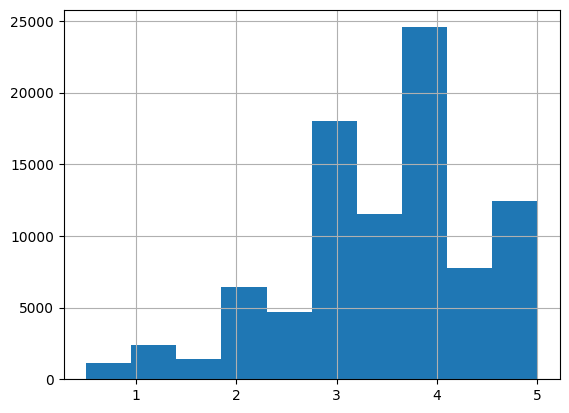

In [171]:
ratingsdf["rating"].hist(bins=10)

In [172]:
user_activity = ratingsdf.groupby("user_idx").size()

user_activity.describe()

count     610.000000
mean      147.990164
std       216.882426
min        12.000000
25%        34.000000
50%        68.000000
75%       159.000000
max      2132.000000
dtype: float64

<Axes: ylabel='Frequency'>

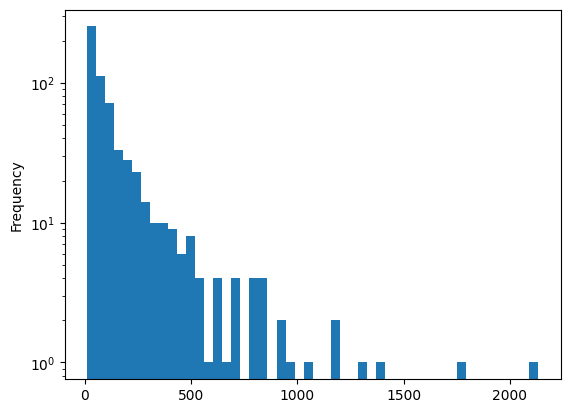

In [173]:
user_activity.plot(kind="hist", bins=50, log=True)

In [174]:
movie_popularity = ratingsdf.groupby("movie_idx").size()

movie_popularity.describe()


count    3650.000000
mean       24.732603
std        31.703576
min         5.000000
25%         7.000000
50%        13.000000
75%        28.000000
max       329.000000
dtype: float64

<Axes: ylabel='Frequency'>

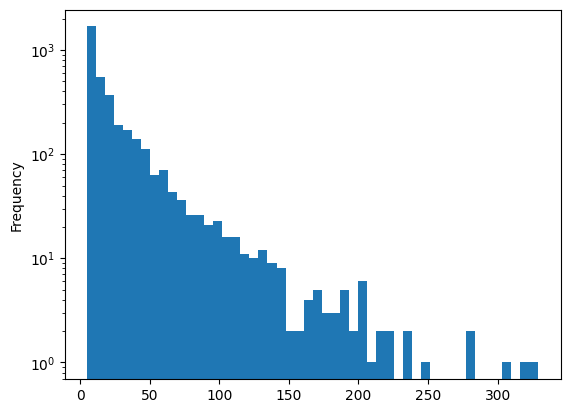

In [175]:
movie_popularity.plot(kind="hist", bins=50, log=True)

In [176]:
ratingsdf.set_index("timestamp")["rating"].resample("Y").count()

C:\Users\ZerX\AppData\Local\Temp\ipykernel_5944\950728861.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ratingsdf.set_index("timestamp")["rating"].resample("Y").count()


timestamp
1996-12-31    5941
1997-12-31    1844
1998-12-31     483
1999-12-31    2339
2000-12-31    9281
2001-12-31    3509
2002-12-31    3137
2003-12-31    3430
2004-12-31    2784
2005-12-31    5241
2006-12-31    3750
2007-12-31    6262
2008-12-31    4000
2009-12-31    3774
2010-12-31    2081
2011-12-31    1515
2012-12-31    4264
2013-12-31    1531
2014-12-31    1222
2015-12-31    5958
2016-12-31    5953
2017-12-31    7147
2018-12-31    4828
Freq: YE-DEC, Name: rating, dtype: int64

C:\Users\ZerX\AppData\Local\Temp\ipykernel_5944\3040765291.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ratingsdf.set_index("timestamp")["rating"].resample("Y").count().plot()


<Axes: xlabel='timestamp'>

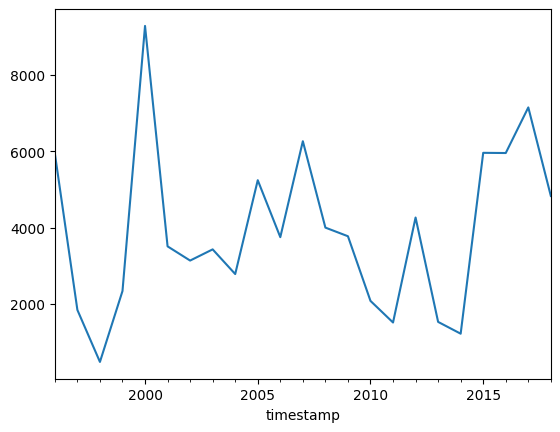

In [177]:
ratingsdf.set_index("timestamp")["rating"].resample("Y").count().plot()

In [178]:
genre_counts = genre_df.sum().sort_values(ascending=False)
genre_counts

Drama          1597
Comedy         1479
Action          928
Thriller        890
Adventure       676
Romance         655
Crime           522
Sci-Fi          486
Fantasy         370
Children        318
Horror          300
Mystery         258
Animation       227
War             156
Musical         145
IMAX            121
Western          69
Documentary      57
Film-Noir        34
dtype: int64

<Axes: >

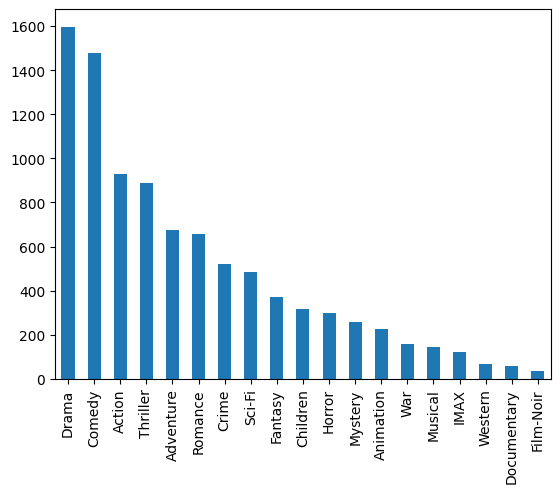

In [179]:
genre_counts.plot(kind="bar")

Conclusion:

Dataset is extremely sparse

User and movie interactions follow long-tail distribution

Ratings are biased toward high values

Time-based split is required

Cold-start is unavoidable

Popularity Baseline

In [181]:
popularity = (
    train_df
    .groupby("movie_idx")
    .agg(
        rating_count=("rating", "count"),
        rating_mean=("rating", "mean")
    )
)

In [182]:
popularity["pop_score"] = (
    popularity["rating_mean"] * popularity["rating_count"]
)

In [183]:
TOP_K = 10

global_top_movies = (
    popularity
    .sort_values("pop_score", ascending=False)
    .head(TOP_K)
    .index
    .tolist()
)

Recommendation Function

In [184]:
user_seen = (
    train_df
    .groupby("user_idx")["movie_idx"]
    .apply(set)
    .to_dict()
)

In [185]:
def recommend_popularity(user_idx, k=10):
    seen = user_seen.get(user_idx, set())

    candidates = (
        popularity
        .drop(index=seen, errors="ignore")
        .sort_values("pop_score", ascending=False)
        .head(k)
        .index
        .tolist()
    )

    return candidates


Time-Aware Popularity

In [186]:
RECENCY_DAYS = 180

recent_cutoff = train_df["timestamp"].max() - pd.Timedelta(days=RECENCY_DAYS)

recent = train_df[train_df["timestamp"] >= recent_cutoff]

In [189]:
recent_popularity = (
    recent
    .groupby("movie_idx")
    .agg(
        rating_count=("rating", "count"),
        rating_mean=("rating", "mean")
    )
)

recent_popularity["pop_score"] = (
    recent_popularity["rating_mean"] * recent_popularity["rating_count"]
)

Evaluation

In [190]:
test_truth = (
    test_df
    .groupby("user_idx")["movie_idx"]
    .apply(set)
    .to_dict()
)

In [191]:
def precision_recall_at_k(recommender, k=10):
    precisions = []
    recalls = []

    for user, true_items in test_truth.items():
        if not true_items:
            continue

        recs = recommender(user, k)
        recs = set(recs)

        hits = len(recs & true_items)

        precisions.append(hits / k)
        recalls.append(hits / len(true_items))

    return np.mean(precisions), np.mean(recalls)


In [192]:
p_at_10, r_at_10 = precision_recall_at_k(recommend_popularity, k=10)

print(f"Popularity baseline:")
print(f"Precision@10 = {p_at_10:.4f}")
print(f"Recall@10    = {r_at_10:.4f}")


Popularity baseline:
Precision@10 = 0.0774
Recall@10    = 0.0398


The popularity-based recommender achieved Precision@10 of 0.077 and Recall@10 of 0.040, serving as a strong non-personalized baseline. This confirms the necessity of personalized recommendation models

Implement item-based collaborative filtering.